In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import csv
import warnings

N = 15

In [3]:
#hide all warnings
#warnings.filterwarnings('ignore')

#show all warnings just once
warnings.filterwarnings(action='once')

# Download Data

In [4]:
#ticker list 
tickers = ["MMM", "ABT", "ABBV", "ABMD", "ACN", "ATVI", "ADBE", "AMD", "AAP", "AES", "AMG", "AFL", "A", "APD", "AKAM", "ALK", "ALB", "ARE", "ALXN", "ALGN", "ALLE", "AGN", "ADS", "LNT", "ALL", "GOOGL", "GOOG", "MO", "AMZN", "AMCR", "AEE", "AAL", "AEP", "AXP", "AIG", "AMT", "AWK", "AMP", "ABC", "AME", "AMGN", "APH", "ADI", "ANSS", "ANTM", "AON", "AOS", "APA", "AIV", "AAPL", "AMAT", "APTV", "ADM", "ARNC", "ANET", "AJG", "AIZ", "T", "ADSK", "ADP", "AZO", "AVB", "AVY", "BHGE", "BLL", "BAC", "BK", "BAX", "BBT", "BDX", "BRK-B", "BBY", "BIIB", "BLK", "HRB", "BA", "BWA", "BXP", "BSX", "BMY", "AVGO", "BR", "BF-B", "CHRW", "COG", "CDNS", "CPB", "COF", "CPRI", "CAH", "KMX", "CCL", "CAT", "CBOE", "CBRE", "CBS", "CDW", "CE", "CELG", "CNC", "CNP", "CTL", "CERN", "CF", "SCHW", "CHTR", "CVX", "CMG", "CMI", "CVS", "DHI", "DHR", "DRI", "DVA", "DE", "DAL", "XRAY", "DVN", "FANG", "DLR", "DFS", "DISCA", "DISCK", "DISH", "DG", "DLTR", "D", "DOV", "DOW", "DTE", "DUK", "DRE", "DD", "DXC", "ETFC", "EMN", "ETN", "FLT", "FLIR", "FLS", "FMC", "F", "FTNT", "FTV", "FBHS", "FOXA", "FOX", "BEN", "FCX", "GPS", "GRMN", "IT", "GD", "GE", "GIS", "GM", "GPC", "GILD", "GL", "GPN", "GS", "GWW", "HAL", "HBI", "HOG", "HIG", "HAS", "HCA", "HCP", "HP", "HSIC", "HSY", "HES", "HPE", "HLT", "HFC", "HOLX", "HD", "HON", "HRL", "HST", "HPQ", "HUM", "HBAN", "IDXX", "INFO", "ITW", "ILMN", "IR", "INTC", "ICE", "IBM", "INCY", "IP", "IPG", "IFF", "INTU", "ISRG", "IVZ", "IPGP", "IQV", "IRM", "JKHY", "JEC", "JBHT", "SJM", "JNJ", "JCI", "JPM", "JNPR", "KSU", "K", "KEY", "KEYS", "KMB", "KIM", "KMI", "KLAC", "KSS", "KHC", "KR", "LB", "LHX", "LH", "LRCX", "LW", "LVS", "LEG", "LDOS", "LEN", "LLY", "LNC", "LIN", "LKQ", "LMT", "L", "LOW", "LYB", "MTB", "MAC", "M", "MRO", "MPC", "MKTX", "MAR", "MMC", "MLM", "MAS", "MA", "MKC", "MXIM", "MCD", "MCK", "MDT", "MRK", "MET", "MTD", "MGM", "MCHP", "MU", "MSFT", "MAA", "MHK", "TAP", "MDLZ", "MNST", "MCO", "MS", "MOS", "MSI", "MYL", "NDAQ", "NOV", "NTAP", "NFLX", "NWL", "NEM", "NWSA", "NWS", "NEE", "NLSN", "NKE", "NI", "NBL", "JWN", "NSC", "NTRS", "NOC", "NCLH", "NRG", "NUE", "NVDA", "ORLY", "OXY", "OMC", "OKE", "ORCL", "PCAR", "PKG", "PH", "PAYX", "PYPL", "PNR", "PBCT", "PEP", "PKI", "PRGO", "PFE", "PM", "PSX", "PNW", "PXD", "PNC", "PPG", "PPL", "PFG", "PG", "PGR", "PLD", "PRU", "PEG", "PSA", "PHM", "PVH", "QRVO", "PWR", "QCOM", "DGX", "RL", "RJF", "RTN", "O", "REG", "REGN", "RF", "RSG", "RMD", "RHI", "ROK", "ROL", "ROP", "ROST", "RCL", "CRM", "SBAC", "SLB", "STX", "SEE", "SRE", "SHW", "SPG", "SWKS", "SLG", "SNA", "SO", "LUV", "SPGI", "SWK", "SBUX", "STT", "SYK", "STI", "SIVB", "SYMC", "SYF", "SNPS", "SYY", "TMUS", "TROW", "TTWO", "TPR", "TGT", "TEL", "FTI", "TFX", "TXN", "TXT", "TMO", "TIF", "TWTR", "TJX", "TSCO", "TDG", "TRV", "TRIP", "TSN", "UDR", "ULTA", "USB", "UAA", "UA", "UNP", "UAL", "UNH", "UPS", "URI", "UTX", "UHS", "UNM", "VFC", "VLO", "VAR", "VTR", "VRSN", "VRSK", "VZ", "VRTX", "VIAB", "V", "VNO", "VMC", "WAB", "WMT", "WBA", "DIS", "WM", "WAT", "WEC", "WCG", "WFC", "WELL", "WDC", "WU", "WRK", "WY", "WHR", "WMB", "WLTW", "WYNN", "XEL", "XRX", "XLNX", "XYL", "YUM", "ZBH", "ZION", "ZTS"]

data = pd.DataFrame()
df = pd.DataFrame()
returns = pd.DataFrame(columns=tickers)

df_l = []
#write data into pandas dataframe 
for ticker in tickers:
    loaded = yf.download(ticker, start="2019-08-01", end="2019-08-30").loc[:,['Adj Close']]
    df = loaded.pct_change(fill_method='ffill')
    df_l.append(df)
    #returns.loc[:,ticker] = df
df = pd.concat(df_l, axis=1)
df.columns = tickers
df.iloc[1:, :]

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-01,-0.007797,-0.011643,-0.012363,-0.264539,0.008187,0.029750,-0.001405,-0.019376,-0.004582,0.030012,...,0.004214,-0.054960,0.019247,-0.014447,-0.006589,-0.018421,0.039336,0.017570,-0.047204,0.007059
2019-08-02,-0.016241,-0.003032,-0.006885,-0.020745,-0.005948,-0.023311,-0.015849,-0.014066,-0.027820,-0.026807,...,-0.003378,-0.026203,-0.015405,-0.033461,-0.028920,-0.016213,0.003519,0.004153,-0.009157,0.005712
2019-08-05,-0.034201,-0.031001,-0.001733,0.019490,-0.038610,-0.059568,-0.045453,-0.049253,-0.017980,-0.030539,...,-0.034148,-0.071784,-0.003197,-0.040554,-0.028780,-0.037763,-0.019499,-0.022854,-0.032227,-0.032527
2019-08-06,-0.006065,0.020403,-0.007102,-0.019801,0.017536,0.010629,0.020866,0.031083,0.017331,-0.037678,...,0.028816,0.006907,0.013333,-0.001718,-0.009190,0.016318,0.008548,0.001708,0.020323,0.076314
2019-08-07,-0.000431,-0.003076,-0.004769,-0.052624,0.000319,0.032410,0.009818,0.011435,-0.010991,-0.001926,...,-0.004082,-0.017599,0.005996,-0.001377,-0.007004,0.002654,0.001816,0.007783,-0.016559,-0.002231
2019-08-08,0.003515,0.011393,0.015333,0.009319,0.028129,0.025572,0.030309,0.162042,0.002709,0.010932,...,0.025166,0.014607,0.014073,0.016201,0.046893,0.015617,0.009151,0.020079,0.019522,0.026586
2019-08-09,-0.004547,0.012321,0.002045,-0.003652,-0.013913,-0.025745,-0.009907,0.007960,-0.000693,-0.017176,...,-0.005061,-0.023271,0.001959,-0.051221,-0.051074,-0.004952,0.014457,-0.004470,-0.006702,0.007745
2019-08-12,-0.008396,-0.022603,-0.016013,0.003770,-0.007710,-0.020391,-0.020961,-0.051477,-0.015041,-0.021359,...,-0.021723,-0.017058,-0.003748,-0.003933,-0.010074,-0.013882,-0.020828,0.001449,-0.019518,-0.008886
2019-08-13,0.017120,0.026328,0.007339,0.028323,0.015117,0.022302,0.015659,-0.009867,0.000493,-0.004630,...,0.010712,0.017542,-0.002453,0.009332,0.031498,0.016866,0.005081,-0.002459,0.005161,0.005977


In [8]:
#write dataframe into file
df.to_csv('data.csv') 

randints = np.random.randint(2, 438, N)
print(randints)

#cut file into random stock charts
data_example = df.iloc[:,randints]
data_example.to_csv('data_example.csv')

[227 360 286  61 433 153 115  23  77 427  11  92 288 165 280]


number of nan's: 0.0
shape data: (0, 0)


""


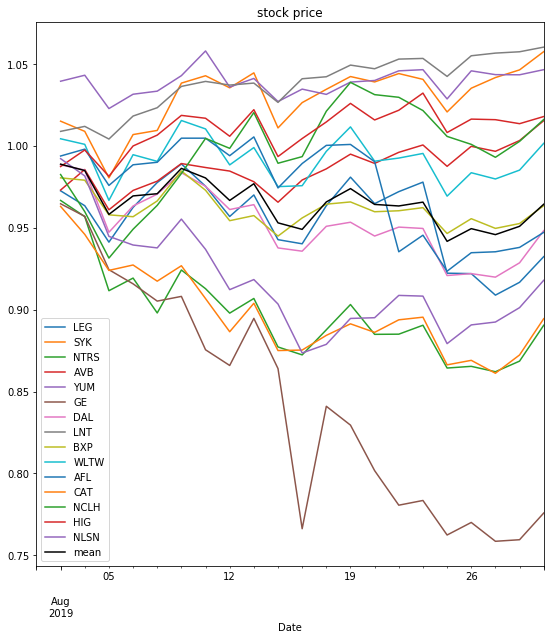

In [10]:
#load parts of data from file
N = 15
data_use = pd.read_csv('data_example.csv', index_col='Date', parse_dates=['Date']).iloc[:,:N]
stock_list = data.columns

print( "number of nan's: {}".format(data.isna().sum().sum()) )
print( "shape data: {}".format(data.shape) )
display(data.head())

# visualize data
if N <= 30:
    fig = plt.figure(figsize=(20,10))

    ax = fig.add_subplot(121)
    np.cumprod(1+data_use, axis=0).plot(ax=ax, title='stock price')
    np.cumprod(1+data_use.mean(axis=1)).plot(ax=ax, label='mean', color='black')
    ax.legend()

    #ax = fig.add_subplot(122)
    #data.plot(ax=ax, title='returns')

    plt.show()

## Helper Functions

In [ ]:
#making Stan models cacheable, 
def StanModel_cache(model_code, model_name=None, **kwargs):
    """Use just as you would `stan`"""
    code_hash = md5(model_code.encode('ascii')).hexdigest()
    if model_name is None:
        cache_fn = 'cached-model-{}.pkl'.format(code_hash)
    else:
        cache_fn = 'cached-{}-{}.pkl'.format(model_name, code_hash)
    try:
        sm = pickle.load(open(cache_fn, 'rb'))
    except:
        sm = pystan.StanModel(model_code=model_code)
        with open(cache_fn, 'wb') as f:
            pickle.dump(sm, f)
    else:
        print("Using cached StanModel")
    return sm 

In [ ]:
#compile stan model
file = "GPLVM_LOO.stan"
with open(file) as f:
    stan_code = f.read

# Execution, Plotting, and Diagnostics

In [ ]:
#execute stan code
stan_model = StanModel_cache(model_code=stan_code)
fit = sm.sampling(data=data, iter=1000, chains=4)
fit.plot()
plt.show